In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as ss
import xarray as xr
import pandas as pd
import matplotlib.cm as cm
from matplotlib import *
import scipy as sc
from scipy.stats import t,norm
from scipy import stats,signal
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import signal
from waveletFunctions import wavelet, wave_signif
from matplotlib.gridspec   import GridSpec

## Reading variables

In [2]:
%store -r rain_south_india
%store -r variance_south
%store -r rain_central_india
%store -r variance_central
%store -r rain_north_india
%store -r variance_north
%store -r p_south
%store -r f
%store -r p_central
%store -r p_north
%store -r p_nino
%store -r p_pc2
%store -r variance_nino34
%store -r variance_pc2
%store -r pc2_detrend
%store -r nino34

In [3]:
variance_nino34 = np.std(nino34/nino34.std(), ddof=1) ** 2
variance_nino34

1.0085471335679728

## Function for wavelet analysis

In [4]:
def draw_wavelet(T,variance,ax,title,levels =[0,1,2,3,4,5,6]):
    n    = len(T)                             # Number of data points
    dt   = 1                                    # Data sampling rate (here seasonal data)
    time = np.arange(len(T)) * dt + 1901.0    # construct time array

    xlim = ([1901, 2018])
    pad  = 1                                # pad the time series with zeroes (recommended)
    dj   = 1/8                              # this will do 8 sub-octaves per octave
    s0   = 2 * dt                           # this says start at a scale of 6 months
    j1   = np.fix(np.log2(n*dt/s0) / dj)    # this says do 7 powers-of-two with dj sub-octaves each
    lag1 = np.corrcoef(T[:-1],T[1:])[0,1]                             # lag-1 autocorrelation for red noise background
    mother = 'MORLET'  
    # Wavelet transform:
    wave, period, scale, coi = wavelet(T, dt, pad, dj, s0, j1, mother)
    power                    = (np.abs(wave)) ** 2  # compute wavelet power spectrum
    global_ws                = (np.sum(power, axis=1) / n)  # time-average over all times
    # Significance levels:
    signif = wave_signif(([variance]), dt=dt, sigtest=0, scale=scale,
        lag1=lag1, mother=mother)
    sig95 = signif[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])  # expand signif --> (J+1)x(N) array
    sig95 = power / sig95  # where ratio > 1, power is significant
    # Global wavelet spectrum & significance levels:
    dof = n - scale  # the -scale corrects for padding at edges
    global_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=1,lag1=lag1, dof=dof, mother=mother)
    #--- Contour plot wavelet power spectrum
    
#     levels = [0, 0.5, 1, 2, 4,np.fix(power.max()+1)]
#     levels =[0,1,2,3,4,5,6]
    CS = ax.contourf(time, period, power, levels,extend="max")  #*** or use 'contour'
    im = ax.contourf(CS,  colors=['white','bisque','orange','orangered','red','darkred'])
    ax.set_yscale('log', basey=2, subsy=None)
    ax.set_xlabel('Time (year)')
    ax.set_ylabel('Period (years)')
    ax.set_title(title)
    ax.set_xlim(xlim[:])
    
    # 95# significance contour, levels at -99 (fake) and 1 (95# signif)
    ax.contour(time, period, sig95, [-99, 1], colors='k')

    # cone-of-influence, anything "below" is dubious
    ax.plot(time, coi, 'k')

    # format y-scale
    ax.set_ylim([np.min(period), np.max(period)])
    ax.set_ylim([0,32])
    ax.invert_yaxis()
    return im

## figure 4- wavelet and powerspectrum

/tmp/ipykernel_103624/1758628074.py:5: RuntimeWarning: divide by zero encountered in true_divide
  ax[0,0].semilogx(1/f,p_pc2,'orange')
/home/cccr/roxy/panini/anaconda3/envs/saranya1/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/tmp/ipykernel_103624/1758628074.py:14: RuntimeWarning: divide by zero encountered in true_divide
  ax[1,0].semilogx(1/f,p_nino,'k')
/home/cccr/roxy/panini/anaconda3/envs/saranya1/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/tmp/ipykernel_103624/1758628074.py:21: RuntimeWarning: divide by zero encountered in true_divide
  ax[2,0].semilogx(1/f,p_south,'r')
/home/cccr/roxy/panini/anaconda3/envs/saranya1/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values

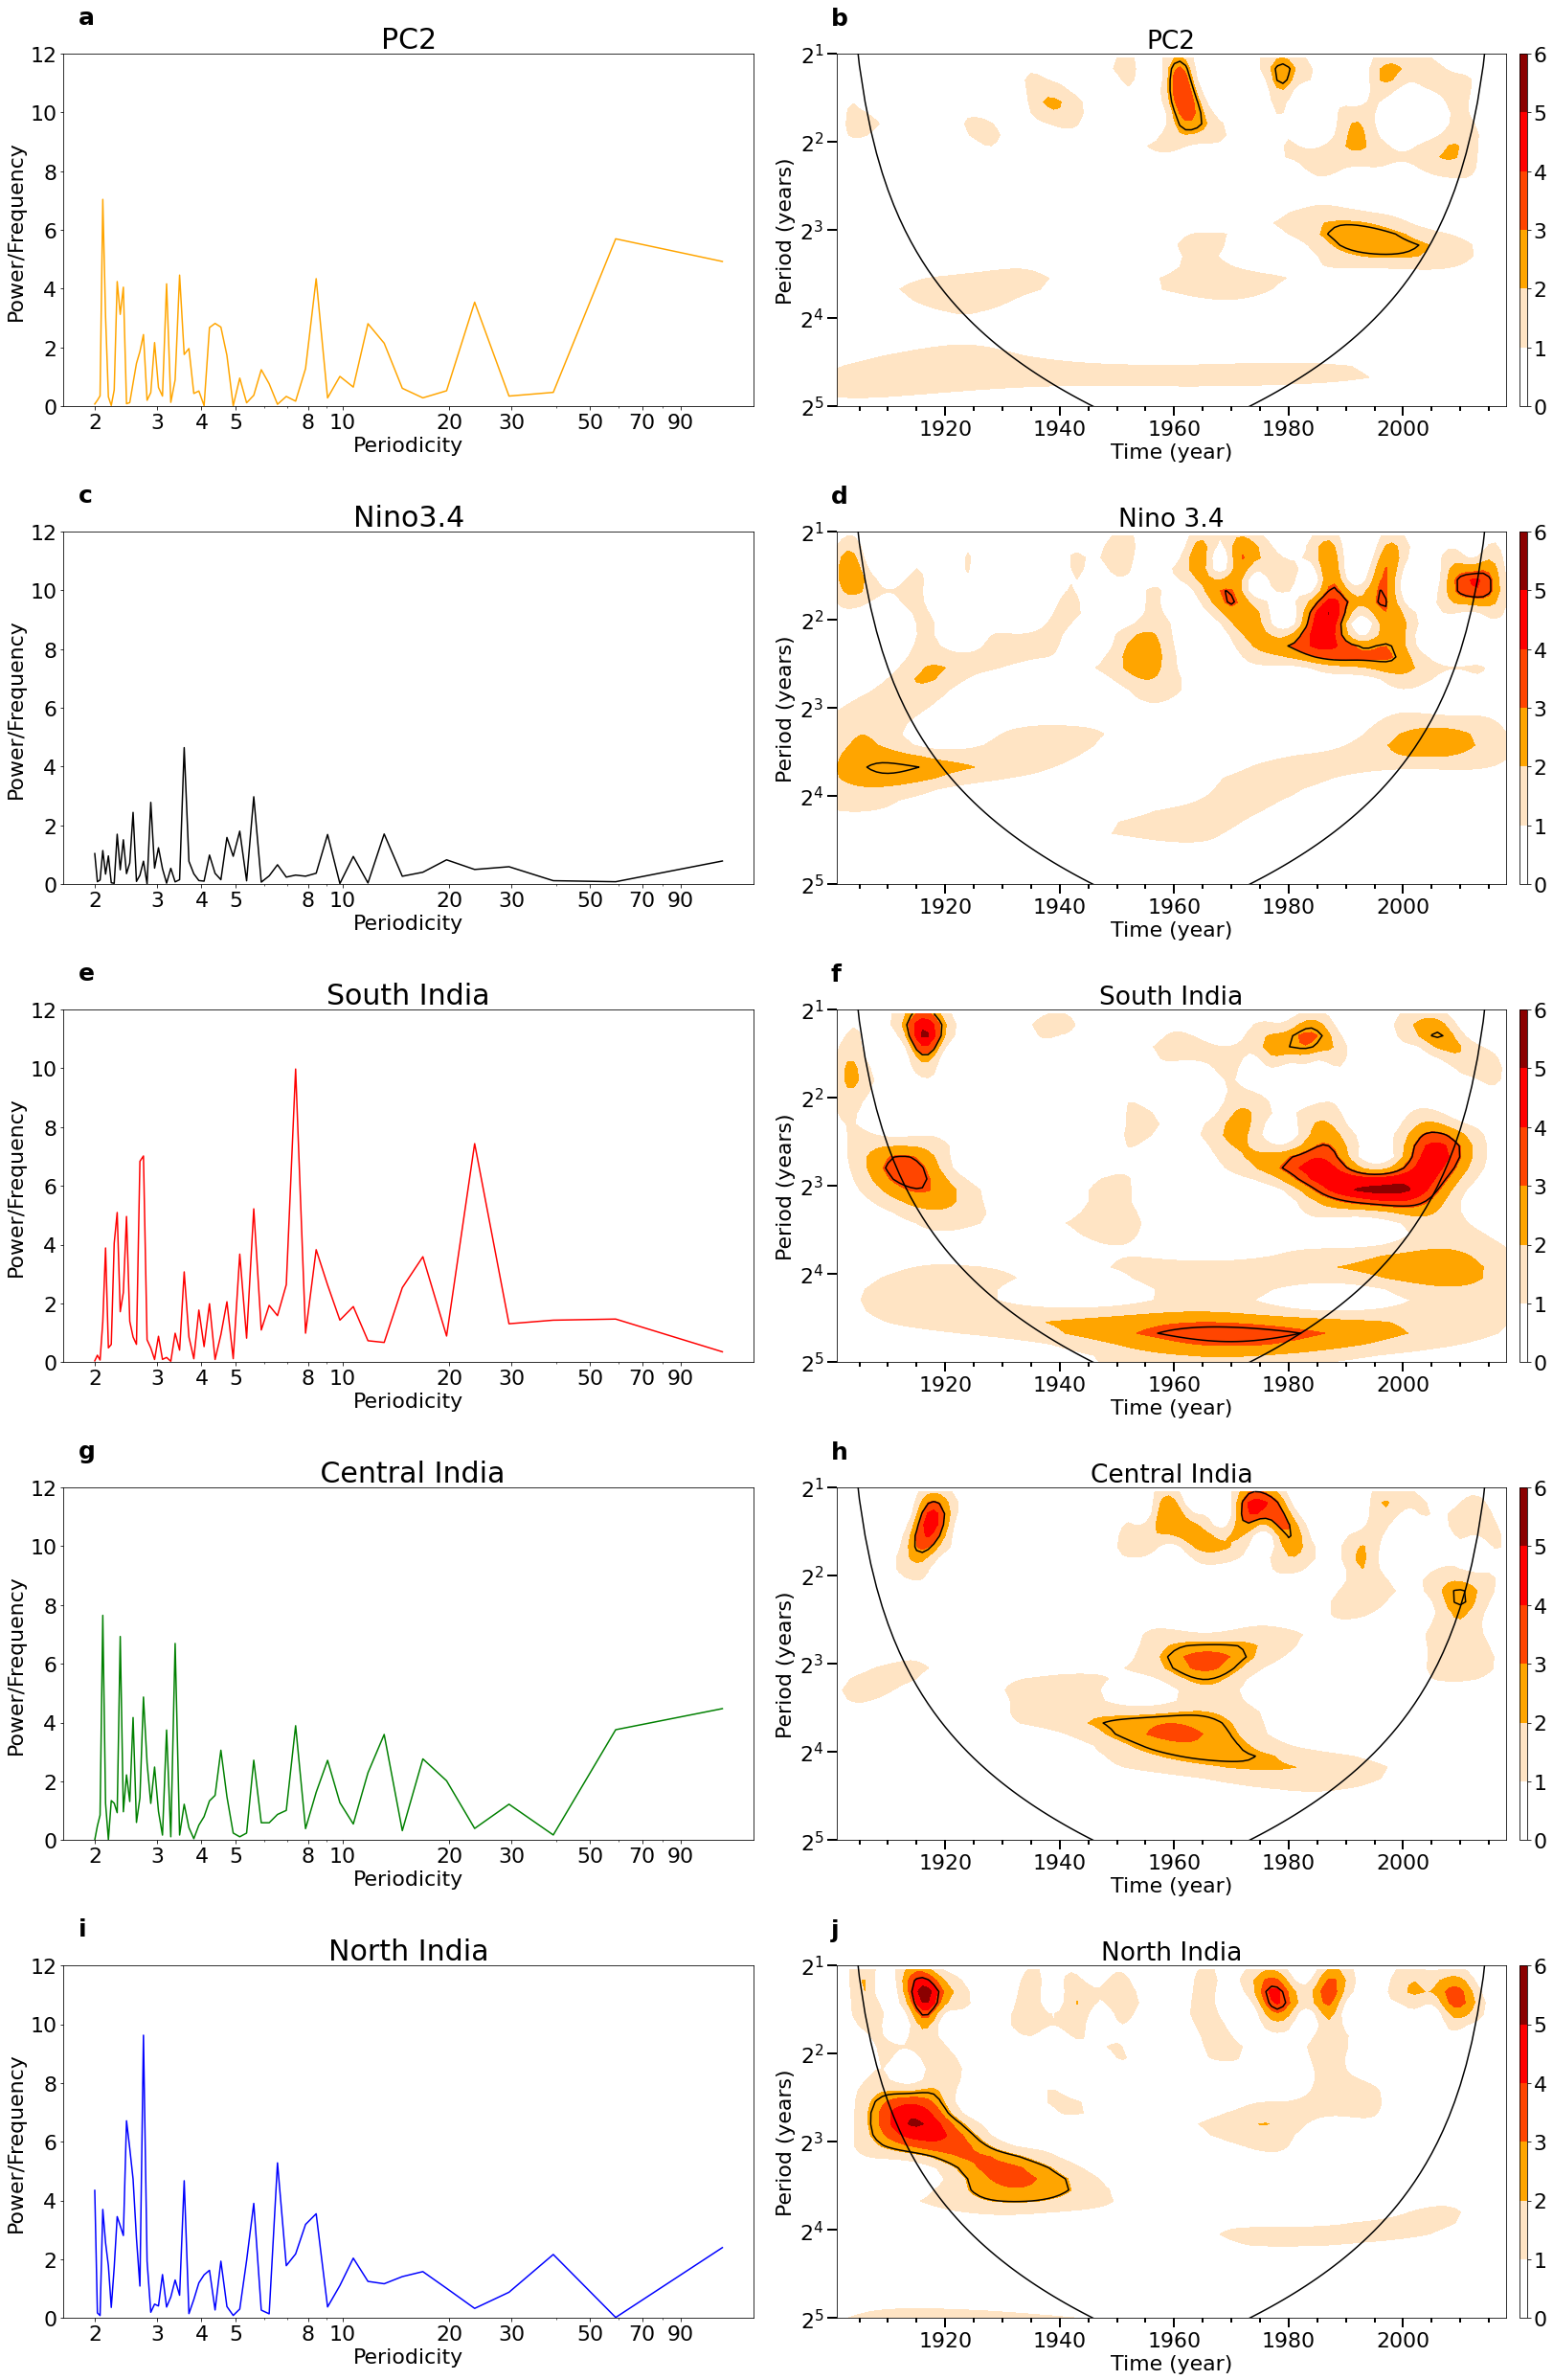

In [73]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['font.size']=22
fig,ax =plt.subplots(5,2,figsize=(23,35))
fig.subplots_adjust(hspace=0.0,wspace=0.0)
ax[0,0].semilogx(1/f,p_pc2,'orange')
ax[0,0].set_title(r'PC2', fontsize=30)
s = [2,3,4,5,8,10,20,30,50,70,90]
s1 = [str(i) for i in s]
ax[0,0].set_xticks(s)
ax[0,0].set_xticklabels(s1)
ax[0,0].set_ylim([0,12])
ax[0,0].text(1.8, 13,'a', fontsize=25, weight="bold")

ax[1,0].semilogx(1/f,p_nino,'k')
ax[1,0].set_title(r'Nino3.4', fontsize=30)
ax[1,0].set_xticks(s)
ax[1,0].set_xticklabels(s1)
ax[1,0].set_ylim([0,12])
ax[1,0].text(1.8, 13,'c', fontsize=25, weight="bold")

ax[2,0].semilogx(1/f,p_south,'r')
ax[2,0].set_title(r'South India', fontsize=30)
ax[2,0].set_xticks(s)
ax[2,0].set_xticklabels(s1)
ax[2,0].set_ylim([0,12])
ax[2,0].text(1.8, 13,'e', fontsize=25, weight="bold")


ax[3,0].semilogx(1/f,p_central,'g')
ax[3,0].set_xticks(s)
ax[3,0].set_xticklabels(s1)
ax[3,0].set_ylim([0,12])
ax[3,0].set_title(r' Central India', fontsize=30)
ax[3,0].text(1.8, 13,'g', fontsize=25, weight="bold")


ax[4,0].semilogx(1/f,p_north,'b')
ax[4,0].set_xticks(s)
ax[4,0].set_xticklabels(s1)
ax[4,0].set_ylim([0,12])
ax[4,0].set_title(r'North India',fontsize=30)
ax[4,0].text(1.8, 13,'i', fontsize=25, weight="bold")


for i in np.arange(5):
    ax[i,0].set_xlabel('Periodicity')
    ax[i,0].set_ylabel('Power/Frequency')

im1 = draw_wavelet(pc2_detrend,variance_pc2,ax[0,1], title="PC2")
divider = make_axes_locatable(ax[0,1])
ax[0,1].minorticks_on()
ax[0,1].tick_params(which='minor', length=5,width=2)
ax[0,1].tick_params(which='major', length=10,width=2)
cax = divider.append_axes("right", 0.1, pad=0.2)
plt.colorbar(im1, cax=cax)
ax[0,1].set_ylim([2**5, 2])
ax[0,1].text(1900,1.6,'b', fontsize=25, weight="bold")

im2 = draw_wavelet(nino34/nino34.std(),variance_nino34,ax[1,1], title="Nino 3.4")
divider = make_axes_locatable(ax[1,1])
ax[1,1].minorticks_on()
ax[1,1].tick_params(which='minor', length=5,width=2)
ax[1,1].tick_params(which='major', length=10,width=2)
cax = divider.append_axes("right", 0.1, pad=0.2)
plt.colorbar(im2, cax=cax)
ax[1,1].set_ylim([2**5, 2])
ax[1,1].text(1900,1.6,'d', fontsize=25, weight="bold")

im3 = draw_wavelet(rain_south_india,variance_south,ax[2,1], title="South India")
divider = make_axes_locatable(ax[2,1])
ax[2,1].minorticks_on()
ax[2,1].tick_params(which='minor', length=5,width=2)
ax[2,1].tick_params(which='major', length=10,width=2)
cax = divider.append_axes("right", 0.1, pad=0.2)
plt.colorbar(im3, cax=cax)
ax[2,1].set_ylim([2**5, 2])
ax[2,1].text(1900,1.6,'f', fontsize=25, weight="bold")

im4 = draw_wavelet(rain_central_india,variance_central,ax[3,1], title="Central India")
divider = make_axes_locatable(ax[3,1])
ax[3,1].minorticks_on()
ax[3,1].tick_params(which='minor', length=5,width=2)
ax[3,1].tick_params(which='major', length=10,width=2)
cax = divider.append_axes("right", 0.1, pad=0.2)
plt.colorbar(im4, cax=cax)
ax[3,1].set_ylim([2**5, 2])
ax[3,1].text(1900,1.6,'h', fontsize=25, weight="bold")

im5 = draw_wavelet(rain_north_india,variance_north,ax[4,1], title="North India")
divider = make_axes_locatable(ax[4,1])
ax[4,1].minorticks_on()
ax[4,1].tick_params(which='minor', length=5,width=2)
ax[4,1].tick_params(which='major', length=10,width=2)
ax[4,1].text(1900,1.6,'j', fontsize=25, weight="bold")

cax = divider.append_axes("right", 0.1, pad=0.2)
plt.colorbar(im5, cax=cax)
# plt.rcParams['font.size'] = 28
ax[4,1].set_ylim([2**5, 2])

plt.tight_layout()
plt.savefig("/home/cccr/roxy/athira/enso_paper/figure4.png", transparent = True, bbox_inches='tight', dpi=300)
